# Ising model in 2*2 lattice

## 1. Background
- Statistical model for describing ferromagnetism [[wikipedia]](https://en.wikipedia.org/wiki/Ising_model)
- Spontaneous magnetization affect by temperature

## 2. Rules
- Assume 2D 2*2 lattice
- Get Magenetic Moment plot on high temperature ($\beta = 0.01$) and low temperature ($\beta = 1$)
- Information matrix of high temperature ($\beta = 0.01$)

|Index|microstate|M|E|$e^{-\beta E} $|Probability|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|++++|4|-4|1.0408|0.065|
|2|+++-|2|0|1|0.0625|
|3|++-+|2|0|1|0.0625|
|4|+-++|2|0|1|0.0625|
|5|-+++|2|0|1|0.0625|
|6|++--|0|0|1|0.0625|
|7|-+-+|0|0|1|0.0625|
|8|--++|0|0|1|0.0625|
|9|+-+-|0|0|1|0.0625|
|10|-++-|0|4|0.9608|0.06|
|11|+--+|0|4|0.9608|0.06|
|12|+---|-2|0|1|0.0625|
|13|-+--|-2|0|1|0.0625|
|14|--+-|-2|0|1|0.0625|
|15|---+|-2|0|1|0.0625|
|16|----|-4|-4|1.0408|0.065|

- Information matrix of low temperature ($\beta = 1$)

|Index|microstate|M|E|$e^{-\beta E} $|Probability|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|++++|4|-4|54.5982|0.4504|
|2|+++-|2|0|1|0.0082|
|3|++-+|2|0|1|0.0082|
|4|+-++|2|0|1|0.0082|
|5|-+++|2|0|1|0.0082|
|6|++--|0|0|1|0.0082|
|7|-+-+|0|0|1|0.0082|
|8|--++|0|0|1|0.0082|
|9|+-+-|0|0|1|0.0082|
|10|-++-|0|4|0.0183|0.0002|
|11|+--+|0|4|0.0183|0.0002|
|12|+---|-2|0|1|0.0082|
|13|-+--|-2|0|1|0.0082|
|14|--+-|-2|0|1|0.0082|
|15|---+|-2|0|1|0.0082|
|16|----|-4|-4|54.5982|0.4504|

In [1]:
import collections
import itertools

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
np.set_printoptions(formatter={'float_kind':'{:.4f}'.format})

In [2]:
beta = np.array([[0.01], 
                 [1]])
E = np.array([-4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, -4])
exp_matrix = np.exp(-beta*E)
sum_matrix = np.reshape(np.sum(np.exp(-beta*E), axis=1), (-1, 1))
prob_matrix = np.divide(np.exp(-beta*E), sum_matrix)
print(exp_matrix)
print()
print(sum_matrix)
print()
print(prob_matrix)
print()
print(np.sum(prob_matrix, axis=1))

[[1.0408 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.9608
  0.9608 1.0000 1.0000 1.0000 1.0000 1.0408]
 [54.5982 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.0183
  0.0183 1.0000 1.0000 1.0000 1.0000 54.5982]]

[[16.0032]
 [121.2329]]

[[0.0650 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0600
  0.0600 0.0625 0.0625 0.0625 0.0625 0.0650]
 [0.4504 0.0082 0.0082 0.0082 0.0082 0.0082 0.0082 0.0082 0.0082 0.0002
  0.0002 0.0082 0.0082 0.0082 0.0082 0.4504]]

[1.0000 1.0000]


In [3]:
def microstateE(state):
    Nx, Ny = state.shape
    E = 0
    for i in range(Nx):
        for j in range(Ny):
            if 0 < i:
                E += state[i, j]*state[i-1, j]
            if i+1 < Nx:
                E += state[i, j]*state[i+1, j]
            if 0 < j:
                E += state[i, j]*state[i, j-1]
            if j+1 < Ny:
                E += state[i, j]*state[i, j+1]
    return -E/2


def IsingModel(N_eq, N_trials, beta, n):
    state = 2*np.random.randint(2, size=(n, n))-1
    E = microstateE(state)
    M_log = list()
    for trial in range(N_eq + N_trials):
        i, j = np.random.randint(n, size=2)
        state[i, j] = -state[i, j]
        temp_E = microstateE(state)
        if (np.random.rand(1) < min(1, np.exp(-(temp_E-E)*beta)))[0]:
            E = temp_E
        else:
            state[i, j] = -state[i, j]
        
        if trial >= N_eq:
            M_log.append(np.sum(state))
    return M_log

In [4]:
Ns = [[1000, 5000], [2000, 10000], [10000, 50000]]
betas = [0.01, 1]
n = 2
M_logs = {(beta, sum(N)):IsingModel(*N, beta, n) for beta, N in itertools.product(betas, Ns)}

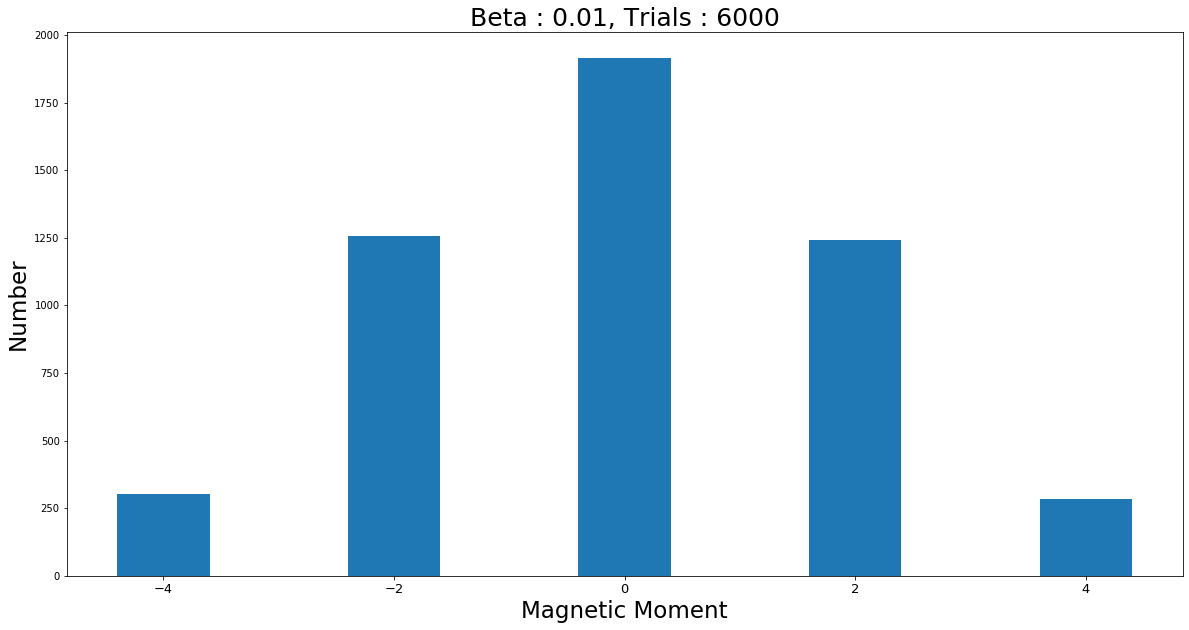

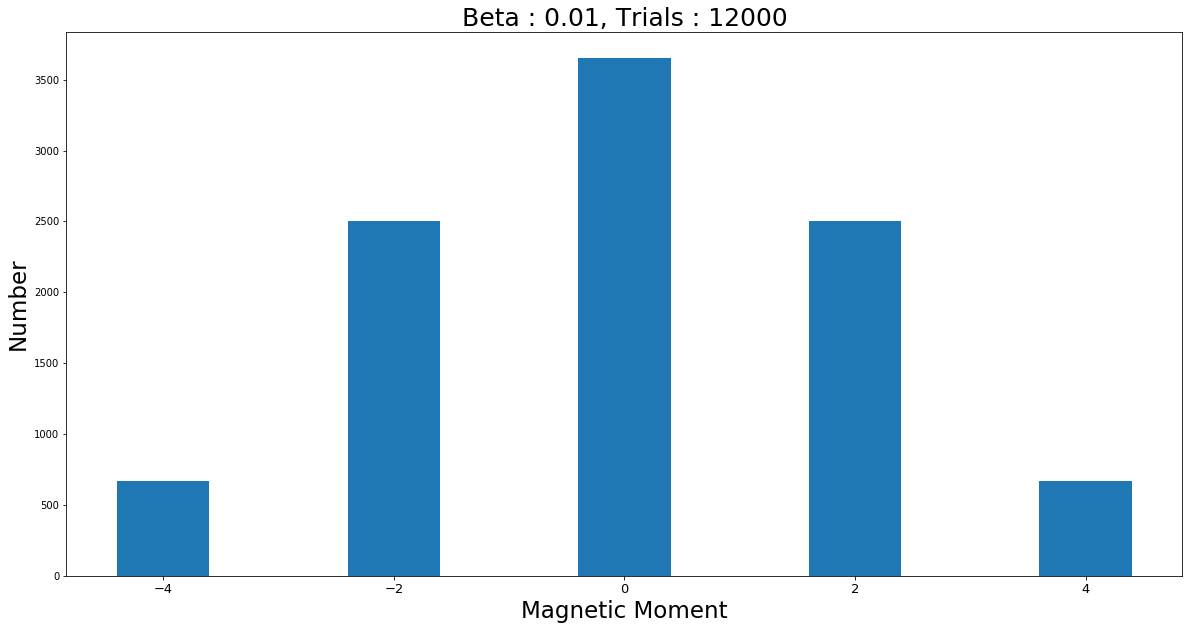

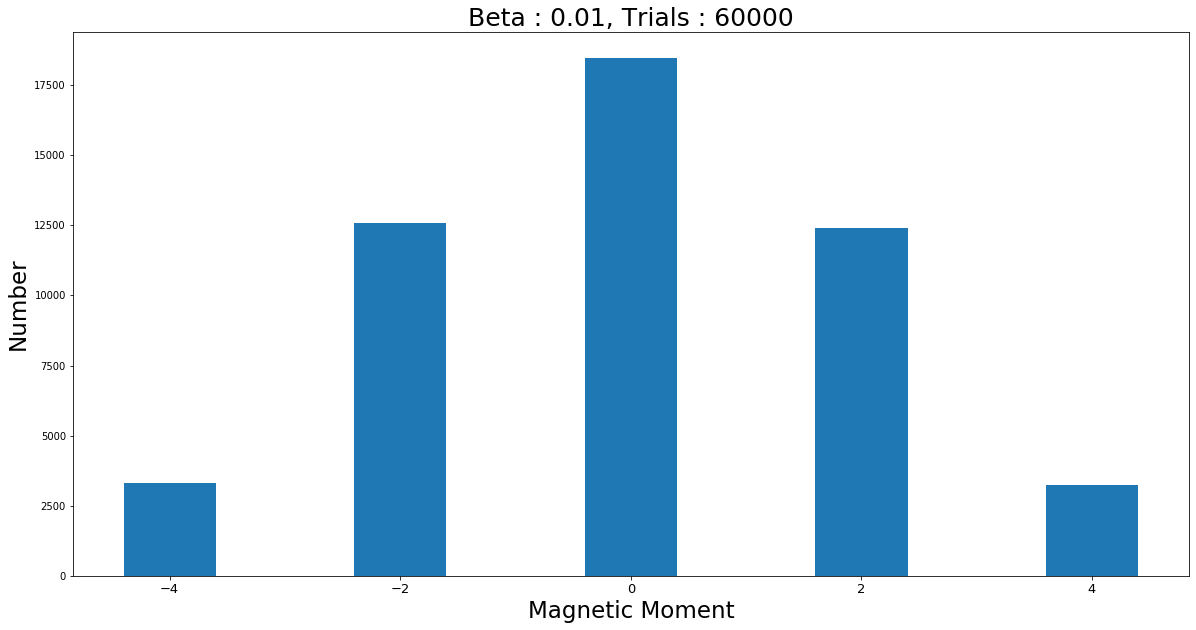

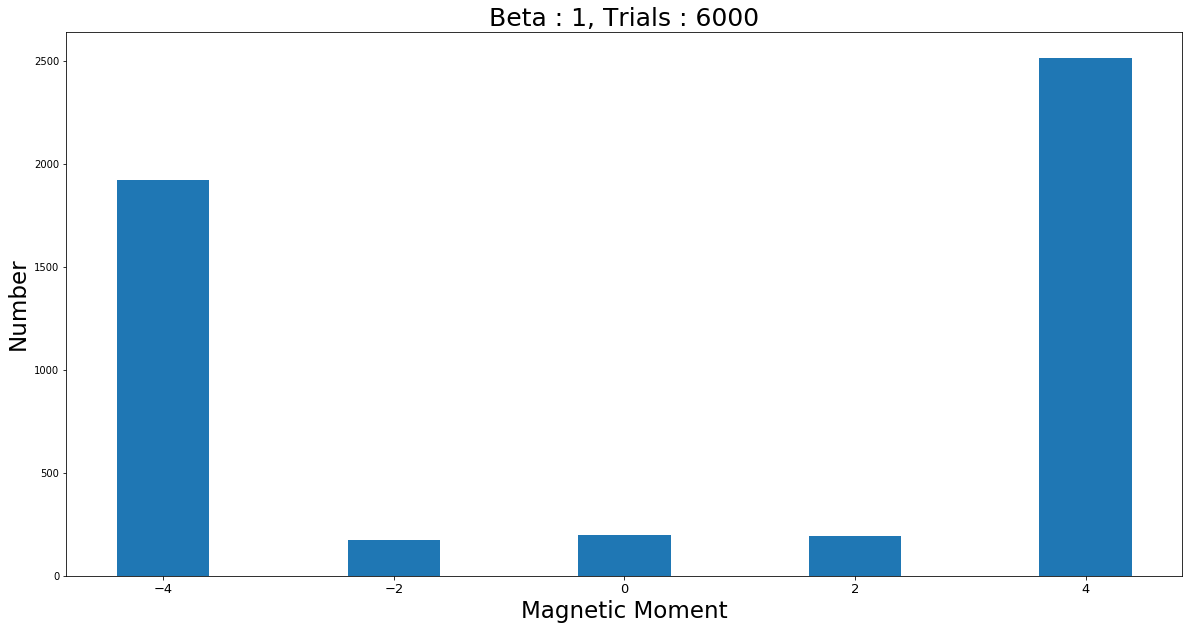

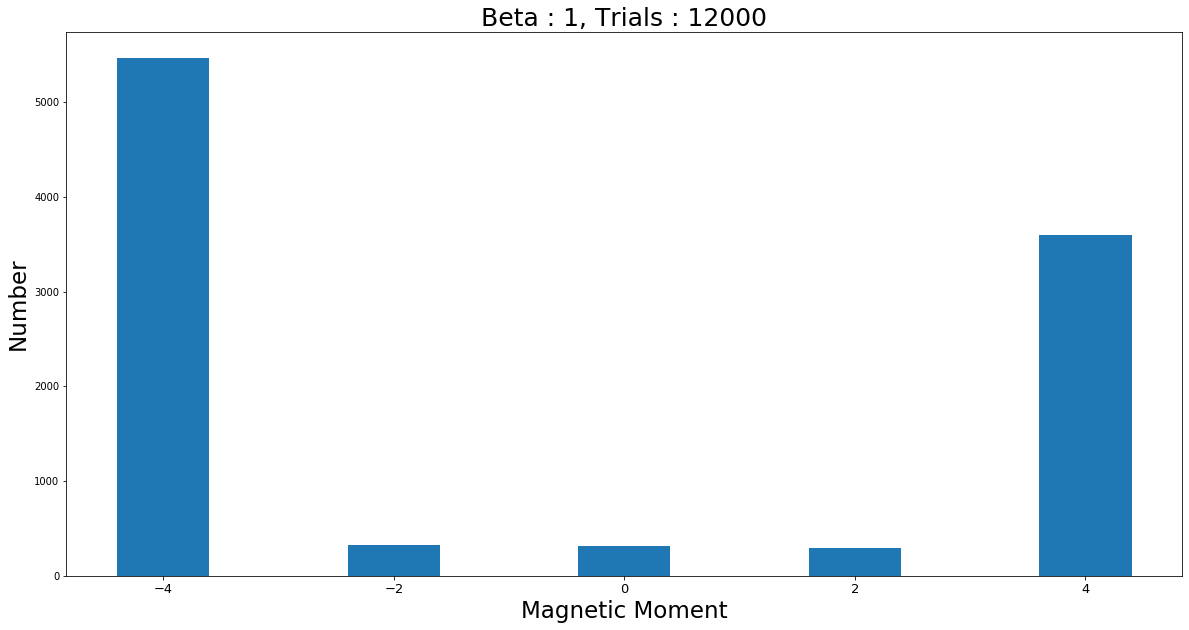

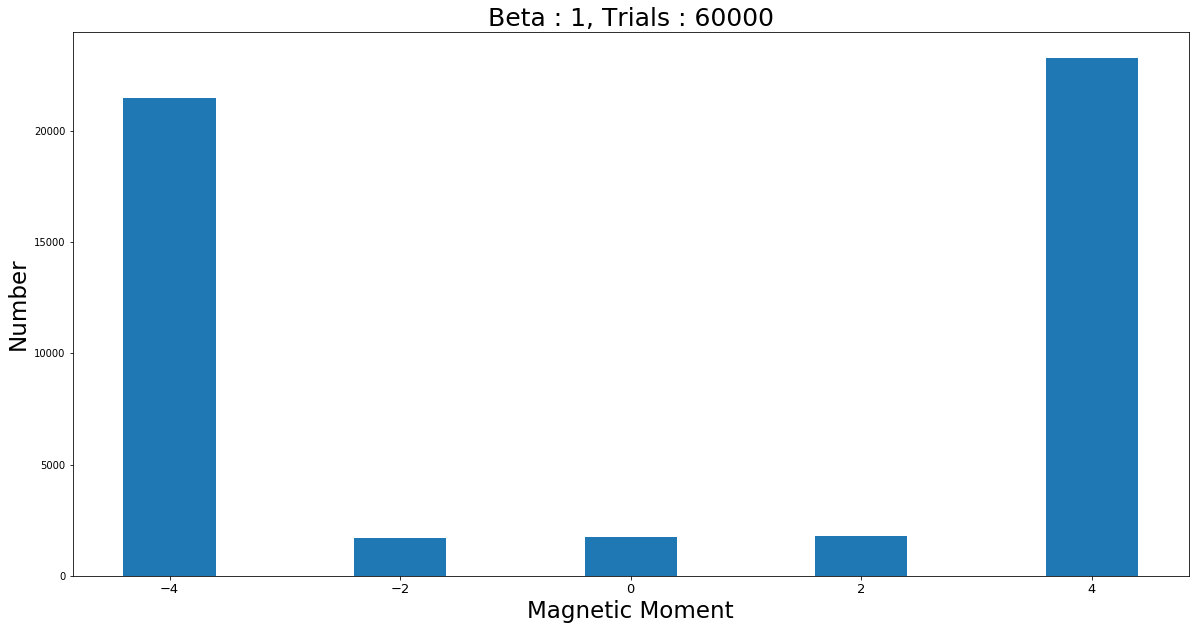

In [5]:
title_fontsize, label_fontsize, tick_fontsize = 25, 23, 13

for (beta, N) in M_logs:
    x, y = zip(*collections.Counter(M_logs[(beta, N)]).items())
    plt.figure(figsize=(20, 10))
    plt.bar(x, y)
    plt.title('Beta : {}, Trials : {}'.format(beta, N), fontsize=title_fontsize)
    plt.xlabel('Magnetic Moment', fontsize=label_fontsize)
    plt.ylabel('Number', fontsize=label_fontsize)
    plt.xticks(x, fontsize=tick_fontsize)
plt.show()